In [ ]:
import pandas as pd 
from scipy import stats
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/loan_data_set.csv")

In [ ]:
#Encoding
data=pd.get_dummies(data,columns=['Property_Area', 'Dependents'])
#data.head()

In [ ]:
#converting categorical values to numerical
data['Education']=data['Education'].replace("Graduate",1)
data['Education']=data['Education'].replace("Not Graduate",0)
data['Self_Employed']=data['Self_Employed'].replace("Yes",1)
data['Self_Employed']=data['Self_Employed'].replace("No",0)
data['Married']=data['Married'].replace("Yes",1)
data['Married']=data['Married'].replace("No",0)
data['Gender']=data['Gender'].replace("Male",1)
data['Gender']=data['Gender'].replace("Female",0)
data['Loan_Status']=data['Loan_Status'].replace("Y",1)
data['Loan_Status']=data['Loan_Status'].replace("N",0)

In [ ]:
#make sure there are no duplicated records
sum(data.duplicated())

0

In [ ]:
#checking for NULLS
print (data.isnull().sum())

Loan_ID                     0
Gender                     13
Married                     3
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
dtype: int64


In [ ]:
data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
count,601.000000,611.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.813644,0.651391,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296,0.291531,0.379479,0.328990,0.561889,0.166124,0.164495,0.083062
std,0.389718,0.476920,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973,0.454838,0.485653,0.470229,0.496559,0.372495,0.371027,0.276201
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(data['Credit_History'].mode)
print(data['Married'].mode)
print(data['Self_Employed'].mode)

<bound method Series.mode of 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64>
<bound method Series.mode of 0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
609    0.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Married, Length: 614, dtype: float64>
<bound method Series.mode of 0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
609    0.0
610    0.0
611    0.0
612    0.0
613    1.0
Name: Self_Employed, Length: 614, dtype: float64>


In [ ]:
#replacing nulls with mean or mode
data['LoanAmount'].fillna(146.412162,inplace=True) 
data['Married'].fillna(0,inplace=True)
data['Self_Employed'].fillna(0,inplace=True)
data['Gender'].fillna(1,inplace=True)
data['Loan_Amount_Term'].fillna(360.00000,inplace=True)
data['Credit_History'].fillna(1,inplace=True)

In [ ]:
print (data.isnull().sum())

Loan_ID                    0
Gender                     0
Married                    0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    float64
 2   Married                  614 non-null    float64
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    float64
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int64  
 11  Property_Area_Rural      614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
 14  Dependents_0             6

In [ ]:
#dropping loan id column as it is irrelevant / costing features 
# costing feature 
data.drop('Loan_ID', axis=1, inplace=True)

<Axes: >

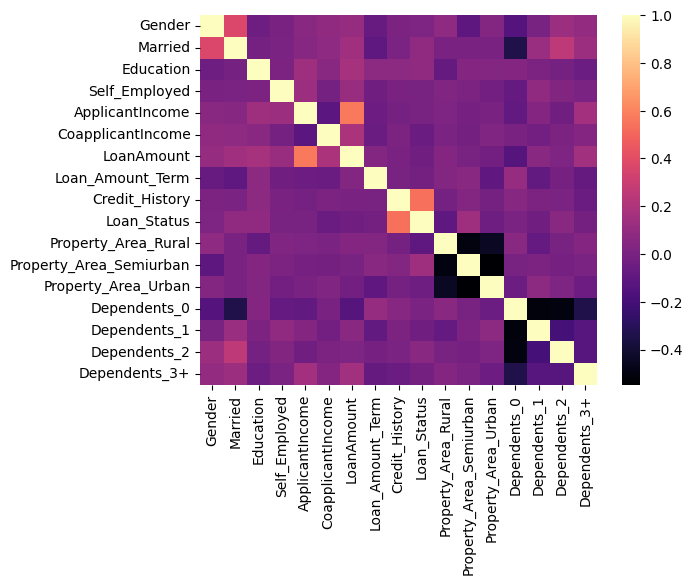

In [ ]:
#Create correlation matrix and visualize it
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='magma')

In [ ]:
#Correlation table
corr_table = data.corr()
corr_table.style.background_gradient(cmap='magma').set_precision(2)

<ipython-input-51-46866af64ca6>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_table.style.background_gradient(cmap='magma').set_precision(2)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
Gender,1.00,0.37,-0.05,-0.00,0.06,0.08,0.11,-0.07,0.01,0.02,0.08,-0.11,0.03,-0.15,-0.00,0.13,0.10
Married,0.37,1.00,-0.02,0.01,0.05,0.08,0.15,-0.10,0.01,0.08,-0.00,-0.00,0.00,-0.34,0.12,0.25,0.14
Education,-0.05,-0.02,1.00,0.01,0.14,0.06,0.17,0.07,0.07,0.09,-0.08,0.04,0.03,0.04,0.01,-0.02,-0.06
Self_Employed,-0.00,0.01,0.01,1.00,0.13,-0.02,0.12,-0.03,-0.00,-0.00,0.02,0.01,-0.03,-0.09,0.08,0.03,0.00
ApplicantIncome,0.06,0.05,0.14,0.13,1.00,-0.12,0.57,-0.05,-0.02,-0.00,0.02,-0.01,-0.00,-0.09,0.04,-0.03,0.16
CoapplicantIncome,0.08,0.08,0.06,-0.02,-0.12,1.00,0.19,-0.06,0.01,-0.06,0.01,-0.03,0.02,0.00,-0.03,0.01,0.04
LoanAmount,0.11,0.15,0.17,0.12,0.57,0.19,1.00,0.04,-0.00,-0.04,0.04,-0.01,-0.03,-0.14,0.06,0.02,0.15
Loan_Amount_Term,-0.07,-0.10,0.07,-0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.02,0.03,0.06,-0.09,0.11,-0.09,-0.01,-0.08
Credit_History,0.01,0.01,0.07,-0.00,-0.02,0.01,-0.00,-0.00,1.00,0.54,-0.02,0.04,-0.02,0.05,0.01,0.01,-0.06
Loan_Status,0.02,0.08,0.09,-0.00,-0.00,-0.06,-0.04,-0.02,0.54,1.00,-0.10,0.14,-0.04,0.01,-0.04,0.06,-0.03


Checking for outliers

<Axes: >

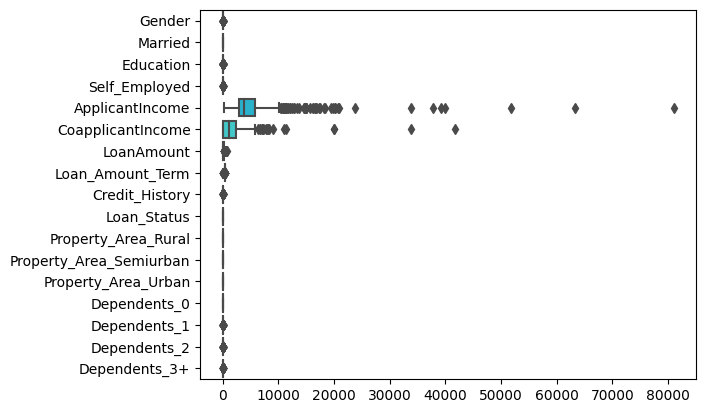

In [ ]:
sns.boxplot(data=data, palette='rainbow', orient='h')

We noticed presence of outliers in "ApplicantIncome" and "CoapplicantIncome" columns

In [ ]:
#calculating maximum non-outlier
z_scores = stats.zscore(data['ApplicantIncome'])
outliers = (z_scores > 3) | (z_scores < -3)
max_non_outlier = np.max(data['ApplicantIncome'][~outliers])
print(max_non_outlier)

20833


In [ ]:
#Replacing outliers with maximum non-outlier
data['ApplicantIncome'] = np.where(data['ApplicantIncome'] > 20833, 20833, data['ApplicantIncome'])

<Axes: >

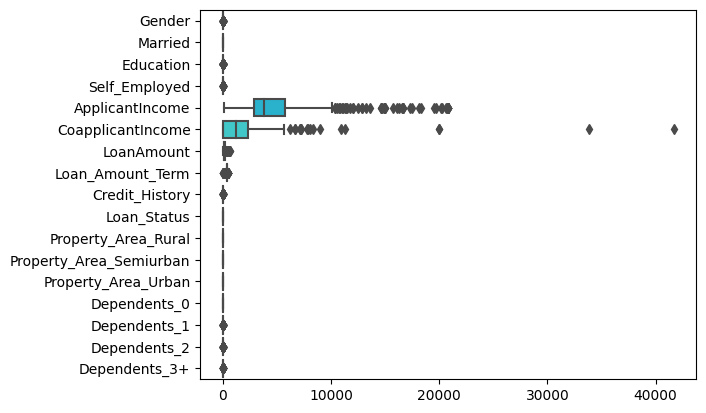

In [ ]:
sns.boxplot(data=data, palette='rainbow', orient='h')

We notice the change in the box plot

In [ ]:
#Repeat same steps with "CoapplicantIncome"
z2_scores = stats.zscore(data['CoapplicantIncome'])
outliers2 = (z2_scores > 3) | (z2_scores < -3)
max2_non_outlier = np.max(data['CoapplicantIncome'][~outliers2])
print(max2_non_outlier)

8980.0


In [ ]:
data['CoapplicantIncome'] = np.where(data['CoapplicantIncome'] > 8980, 8980, data['CoapplicantIncome'])

<Axes: >

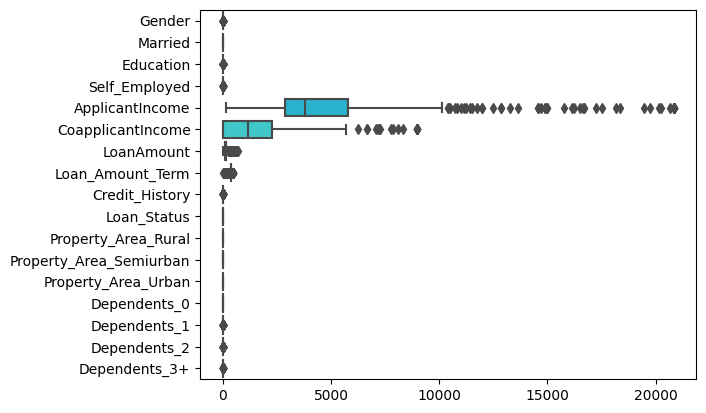

In [ ]:
sns.boxplot(data=data, palette='rainbow', orient='h')

We notice the change in the box plot

Data visualization

<Axes: xlabel='LoanAmount', ylabel='Count'>

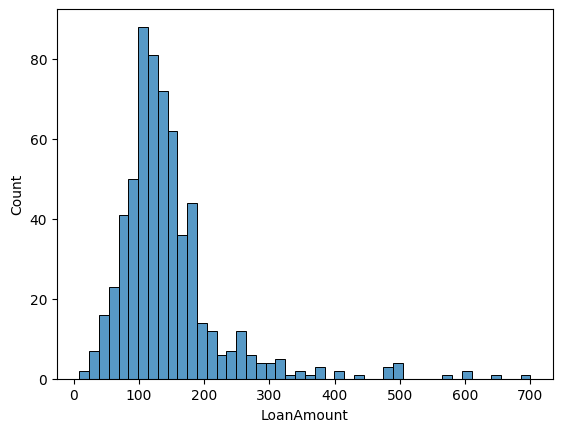

In [ ]:
#plot the 'LoanAmount' column with its density
sns.histplot(data['LoanAmount'])

<Axes: xlabel='Gender', ylabel='LoanAmount'>

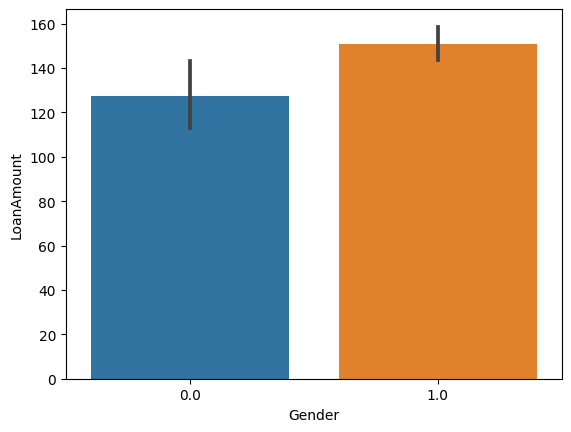

In [ ]:
#bar plot (density)
#note that 1(orange): male, 0(blue):female
sns.barplot(x='Gender',y='LoanAmount',data=data)

In [ ]:
#feature scaling normalization
from sklearn.preprocessing import MinMaxScaler 
#to take an object from class MinMaxScaler
scaler = MinMaxScaler() 
#this code normalizes values in dataframe , but it returns an array
normalized_data = scaler.fit_transform(data)

#converting array to dataframe
df = pd.DataFrame(normalized_data, columns=data.columns)

#now we have df as a normalized dataframe with all values in range [0,1]
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1.0,0.0,1.0,0.0,0.275540,0.000000,0.198860,0.74359,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.214331,0.167929,0.172214,0.74359,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.137794,0.000000,0.082489,0.74359,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.117633,0.262584,0.160637,0.74359,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.282841,0.000000,0.191027,0.74359,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
# Define your data and labels
X =df.drop(['Loan_Status'],axis=1)
y =df['Loan_Status']

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define the range of random_state values to test
random_state_values = range(1, 101)

best_random_state = None
best_accuracy = 0

# Iterate over the random_state values
for random_state in random_state_values:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Initialize and train your model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Evaluate the accuracy
    accuracy = model.score(X_test, y_test)

    # Update the best accuracy and random_state value if necessary
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

# Print the best random_state value and corresponding accuracy
print("Best random_state:", best_random_state)
print("Best accuracy:", best_accuracy)


Best random_state: 8
Best accuracy: 0.8861788617886179


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(solver='liblinear', C=10.0, random_state=8)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)
lr_cr = classification_report(y_test, lr_pred)
print("\nLogistic Regression model results:")
print("Logistic Regression accuracy:", lr_acc)
print("Mean Squared Error:", lr_mse)
print("Confusion Matrix:\n", lr_cm)
print("Classification Report:\n", lr_cr)


Logistic Regression model results:
Logistic Regression accuracy: 0.8861788617886179
Mean Squared Error: 0.11382113821138211
Confusion Matrix:
 [[19 14]
 [ 0 90]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.58      0.73        33
         1.0       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123



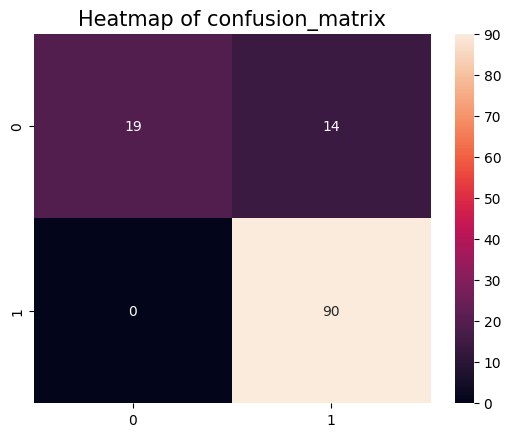

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,lr_pred)
plt.title('Heatmap of confusion_matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Choose a range of random_state values to test
random_state_values = range(1, 101)

best_random_state = None
best_accuracy = 0.0

# Iterate over the random_state values
for random_state in random_state_values:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Initialize and train the SVM model
    svm_classifier = SVC(C=1.0, kernel='linear', random_state=random_state)
    svm_classifier.fit(X_train, y_train)

    # Predict the labels for the test set
    y_predicted = svm_classifier.predict(X_test)

    # Calculate the accuracy
    test_accuracy = accuracy_score(y_test, y_predicted)

    # Update the best accuracy and random_state value if necessary
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_random_state = random_state

# Print the best random_state value and corresponding accuracy
print("Best random_state:", best_random_state)
print("Best accuracy:", best_accuracy)

Best random_state: 8
Best accuracy: 0.8861788617886179


In [ ]:
#SVM
from sklearn.svm import SVC

# Define your data and labels
X =df.drop(['Loan_Status'],axis=1)
y =df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

svm_model = SVC(C=1.0, kernel='linear', random_state=8)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
svm_cr = classification_report(y_test, svm_pred)
print("SVM model results:")
print("SVM accuracy:", svm_acc)
print("Mean Squared Error:", svm_mse)
print("Confusion Matrix:\n", svm_cm)
print("Classification Report:\n", svm_cr)

SVM model results:
SVM accuracy: 0.8861788617886179
Mean Squared Error: 0.11382113821138211
Confusion Matrix:
 [[19 14]
 [ 0 90]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.58      0.73        33
         1.0       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123



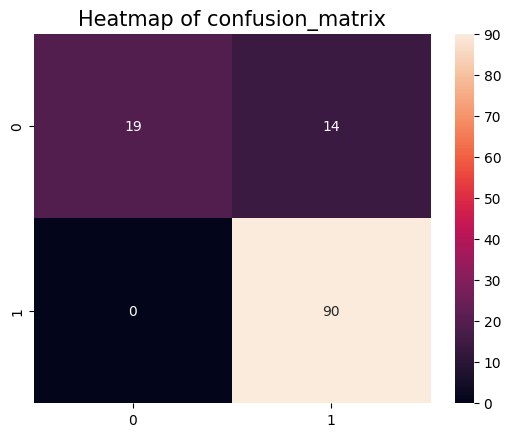

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,svm_pred)
plt.title('Heatmap of confusion_matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

random_state_values = range(1, 101)

best_random_state = None
best_accuracy = 0.0

# Iterate over the random_state values
for random_state in random_state_values:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Initialize and train your Decision Tree model
    dt_model = DecisionTreeClassifier(random_state=random_state)
    dt_model.fit(X_train, y_train)

    # Evaluate the accuracy
    test_accuracy = dt_model.score(X_test, y_test)

    # Update the best accuracy and random_state value if necessary
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_random_state = random_state

# Print the best random_state value and corresponding accuracy
print("Best random_state:", best_random_state)

Best random_state: 7


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define your features and target
X =df.drop(['Loan_Status'],axis=1)
y =df['Loan_Status']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=7, criterion = "entropy",max_depth=1)
dt_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = dt_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy

dt_mse = mean_squared_error(y_test, y_pred)
dt_cm = confusion_matrix(y_test, y_pred)
dt_cr = classification_report(y_test, y_pred)
print("\nDecision Tree model results:")
print("Decision Tree Accuracy:", accuracy)
print("Mean Squared Error:", dt_mse)
print("Confusion Matrix:\n", dt_cm)
print("Classification Report:\n", dt_cr)



Decision Tree model results:
Decision Tree Accuracy: 0.8292682926829268
Mean Squared Error: 0.17073170731707318
Confusion Matrix:
 [[20 19]
 [ 2 82]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.51      0.66        39
         1.0       0.81      0.98      0.89        84

    accuracy                           0.83       123
   macro avg       0.86      0.74      0.77       123
weighted avg       0.84      0.83      0.81       123



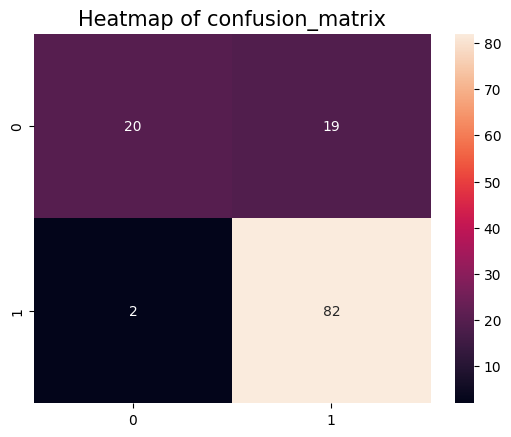

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.title('Heatmap of confusion_matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()